# Import Libraries

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
from arch import arch_model
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Set a style for plots
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("viridis")


# Load and Inspect Data

C:\Users\MMM\AppData\Local\Temp\ipykernel_4040\481020434.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'], errors='coerce')


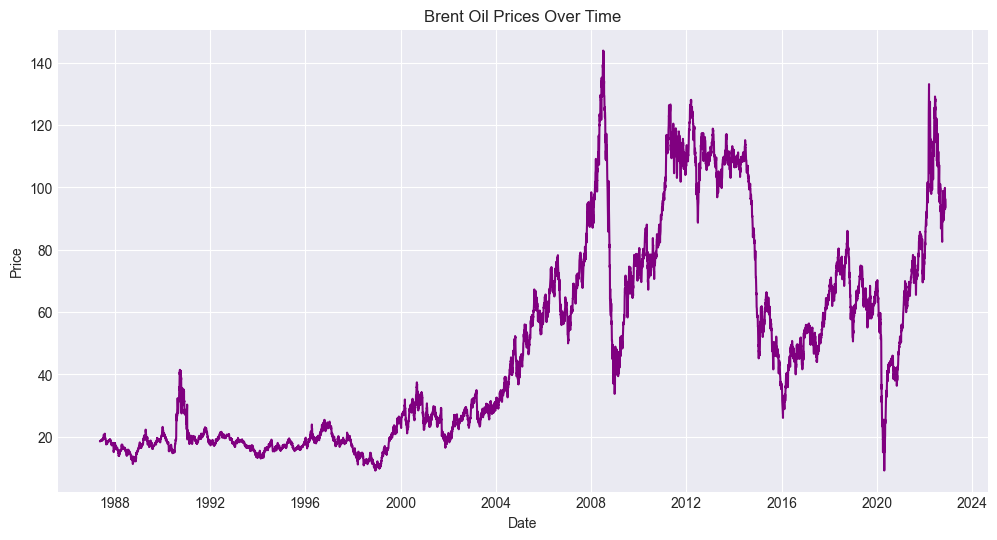

In [7]:
# Load data
file_path = r'C:\Users\MMM\Documents\10 Academy File\KAIM-Week-10\data\Copy of BrentOilPrices.csv'  # Replace with your file path
df = pd.read_csv(file_path)

# Convert Date to datetime and set as index
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df.set_index('Date', inplace=True)
df.dropna(inplace=True)  # Drop any rows with NaT after conversion

# Plot data to understand trends and seasonality
plt.figure(figsize=(12, 6))
plt.plot(df['Price'], color='purple')
plt.title('Brent Oil Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()


# Autocorrelation and Partial Autocorrelation Plots

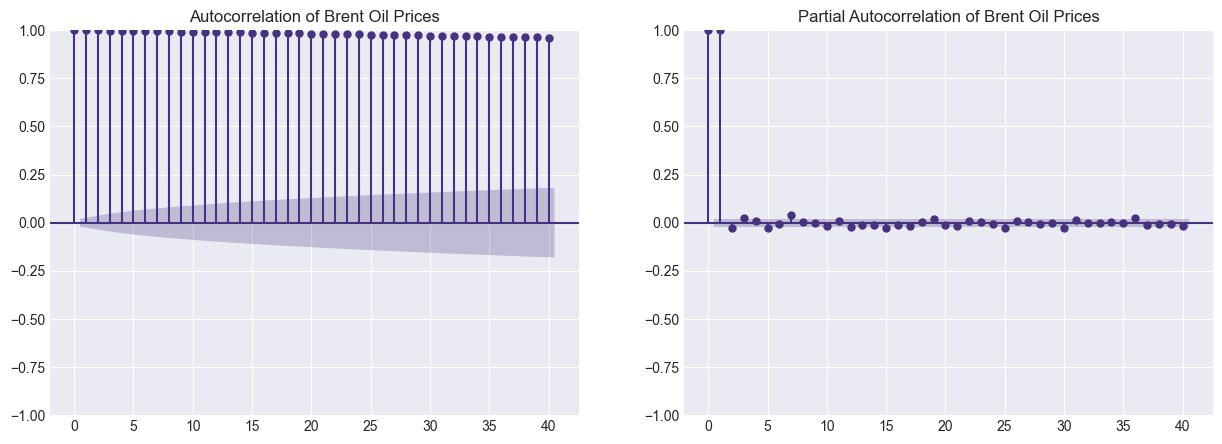

In [8]:
# Autocorrelation and Partial Autocorrelation plots
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

plot_acf(df['Price'], ax=axes[0], lags=40)
axes[0].set_title('Autocorrelation of Brent Oil Prices')

plot_pacf(df['Price'], ax=axes[1], lags=40)
axes[1].set_title('Partial Autocorrelation of Brent Oil Prices')
plt.show()


# ARIMA Model Implementation

c:\Users\MMM\Documents\10 Academy File\KAIM-Week-10\myenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\MMM\Documents\10 Academy File\KAIM-Week-10\myenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\MMM\Documents\10 Academy File\KAIM-Week-10\myenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                 9011
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -14543.950
Date:                Fri, 01 Nov 2024   AIC                          29093.899
Time:                        19:21:04   BIC                          29115.218
Sample:                             0   HQIC                         29101.153
                               - 9011                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3427      0.159     -2.152      0.031      -0.655      -0.031
ma.L1          0.3712      0.157      2.358      0.018       0.063       0.680
sigma2         1.4777      0.008    184.571      0.0

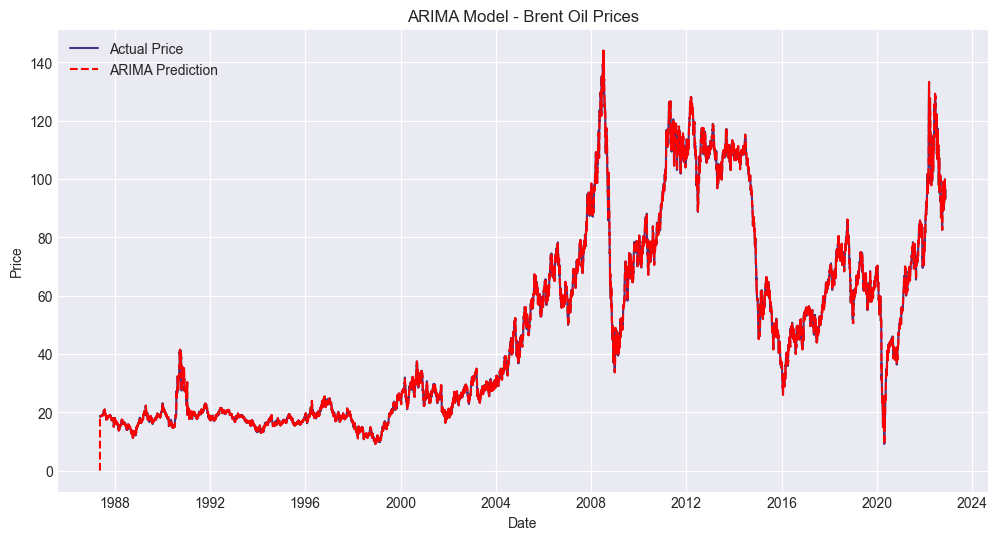

In [9]:
# Define and fit ARIMA model
arima_model = ARIMA(df['Price'], order=(1, 1, 1))  # Adjust p, d, q parameters as needed
arima_fit = arima_model.fit()

# Summarize the ARIMA model results
print(arima_fit.summary())

# Plot the forecasted values
df['ARIMA_Prediction'] = arima_fit.predict(start=0, end=len(df) - 1, dynamic=False)
plt.figure(figsize=(12, 6))
plt.plot(df['Price'], label='Actual Price')
plt.plot(df['ARIMA_Prediction'], color='red', linestyle='--', label='ARIMA Prediction')
plt.title('ARIMA Model - Brent Oil Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


# GARCH Model for Volatility

                     Constant Mean - GARCH Model Results                      
Dep. Variable:                  Price   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -35221.8
Distribution:                  Normal   AIC:                           70451.5
Method:            Maximum Likelihood   BIC:                           70479.9
                                        No. Observations:                 9011
Date:                Fri, Nov 01 2024   Df Residuals:                     9010
Time:                        19:22:03   Df Model:                            1
                               Mean Model                               
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu            18.5742      0.108    172.353      0.000 [ 18.363, 18.78

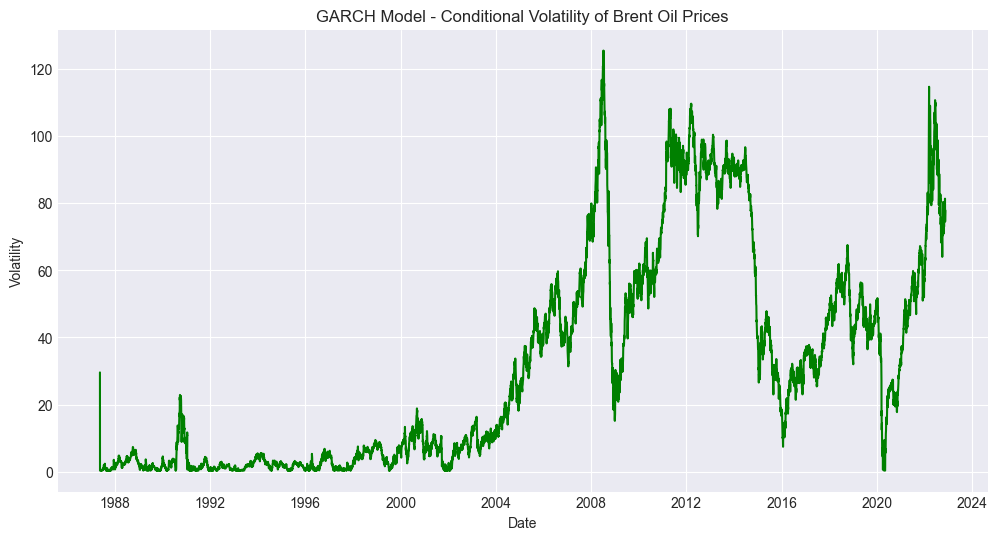

In [10]:
# Fit GARCH model to the residuals of the ARIMA model
garch_model = arch_model(df['Price'], vol='Garch', p=1, q=1)
garch_fit = garch_model.fit(disp="off")

# Summarize the GARCH model results
print(garch_fit.summary())

# Plot the conditional volatility
plt.figure(figsize=(12, 6))
plt.plot(garch_fit.conditional_volatility, color='green')
plt.title('GARCH Model - Conditional Volatility of Brent Oil Prices')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.show()


# Interpretation of Outputs and Limitations

Model Interpretations:

ARIMA Model: The ARIMA model provides a baseline for understanding the trend and autoregressive behavior in Brent oil prices. It assumes linear patterns and is effective for capturing trends and seasonality if present. However, ARIMA has limitations in capturing sudden price volatility.

GARCH Model: GARCH is particularly suited for modeling time-varying volatility, capturing the “clustering” of high and low volatility periods often observed in financial data. This model does not predict prices directly but helps to understand the volatility dynamics, which can be critical in risk management.

Expected Outputs:

The ARIMA model produces price forecasts, while the GARCH model estimates the conditional volatility of price returns.
Limitations:

Both models assume stationarity in different respects, making them less accurate during highly non-stationary periods in price data.
ARIMA may struggle with capturing extreme volatility, while GARCH does not provide direct price predictions.
